In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import math
from matplotlib import cm


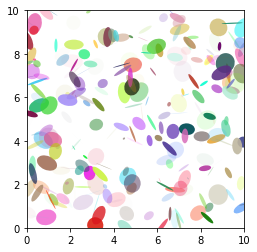

In [2]:
## example code taken from
## https://matplotlib.org/3.1.1/gallery/shapes_and_collections/ellipse_demo.html#sphx-glr-gallery-shapes-and-collections-ellipse-demo-py


NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()


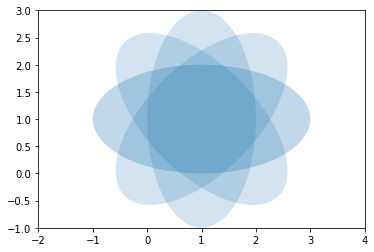

In [3]:
## example copied from
## https://matplotlib.org/3.1.1/gallery/shapes_and_collections/ellipse_demo.html#ellipse-rotated

delta = 45.0  # degrees

angles = np.arange(0, 360 + delta, delta)
ells = [Ellipse((1, 1), 4, 2, a) for a in angles]

a = plt.subplot(111, aspect='equal')

for e in ells:
    e.set_clip_box(a.bbox)
    e.set_alpha(0.1)
    a.add_artist(e)

plt.xlim(-2, 4)
plt.ylim(-1, 3)

plt.show()


In [4]:
p1 = np.array([0,0,0])
v1 = np.array([0,0,1])
txy = 0.05+0.15*abs(np.random.normal())
phi = math.pi*np.random.rand()
tx = txy*math.cos(phi)
ty = txy*math.sin(phi)
x = 0.040*np.random.normal() ## [x] = mm
y = 0.040*np.random.normal() ## [y] = mm
slope = txy
z = 0.040*np.random.normal()/slope
p2 = np.array([x,y,z])
v2 = np.array([tx,ty,1.])

v1sq = np.dot(v1,v1)
v2sq = np.dot(v2,v2)
v1_dot_v2 = np.dot(v1,v2)
a = v1sq
b = -v1_dot_v2
c = v1_dot_v2
d = -v2sq
deltaP = p2 -p1
dp_dot_v1 = np.dot(deltaP,v1)
dp_dot_v2 = np.dot(deltaP,v2)
det = a*d-b*c
inverseMat = np.array([[d,-b],[-c,a]])/det
vectA = np.array([dp_dot_v1,dp_dot_v2])
points = np.matmul(inverseMat,vectA)

matA = np.array([[a,b],[c,d]])
sanity = np.matmul(matA,inverseMat)
print("sanity = ",sanity)

r0 = points[0]
s0 = points[1]

L1_poca = p1 + r0*v1
L2_poca = p2 + s0*v2
v3 = L2_poca - L1_poca
doca = np.sqrt(np.dot(v3,v3))
print("doca = ",doca)
zhat = v3/doca
v1_mag = np.sqrt(np.dot(v1,v1))
xhat = v1/v1_mag
yhat = np.cross(zhat,xhat)


print("p1,v1 = ",p1,v1)
print("slope = ",slope)
print("p2,v2 = ",p2,v2)
print("L1_poca = ",L1_poca)
print("L2_poca = ",L2_poca)
print("")
print("xhat = ",xhat)
print("yhat = ", yhat)
print("zhat = ",zhat)



sanity =  [[1. 0.]
 [0. 1.]]
doca =  0.0479389790718812
p1,v1 =  [0 0 0] [0 0 1]
slope =  0.2187801270683335
p2,v2 =  [ 0.01299093 -0.05136433 -0.0635116 ] [-0.21475523  0.04177243  1.        ]
L1_poca =  [0.         0.         0.03960152]
L2_poca =  [-0.00915315 -0.04705705  0.03960152]

xhat =  [0. 0. 1.]
yhat =  [-0.98160299  0.1909334   0.        ]
zhat =  [-1.90933397e-01 -9.81602994e-01 -5.78977195e-16]


In [5]:
def genLine(transverseRes=0.040,typicalSlope=0.15):
  txy = 0.05+0.15*abs(np.random.normal())
  phi = math.pi*np.random.rand()
  tx = txy*math.cos(phi)
  ty = txy*math.sin(phi)
  x = 0.040*np.random.normal()
  y = 0.040*np.random.normal()
  slope = math.sqrt(tx**2+ty**2)
  z = 0.040*np.random.normal()/slope
  p2 = np.array([x,y,z])
  v2 = np.array([tx,ty,1.])

  return p2, v2
    


In [6]:
p2, v2 = genLine()
print("p2,v2 = ",p2,v2)

p2,v2 =  [-0.04112445  0.02825342  0.11997699] [-0.07726232  0.11959326  1.        ]


In [7]:
xValues = []
yValues = []
zValues = []
for index in range(0,10000):
  p2, v2 = genLine()
##  print("p2,v2 = ",p2,v2)
  xValues.append(p2[0])
  yValues.append(p2[1])
  zValues.append(p2[2])

##print("xValues = ",xValues)
##print("yValues = ",yValues)
##print("zValues = ",zValues)

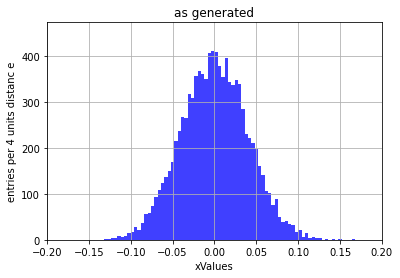

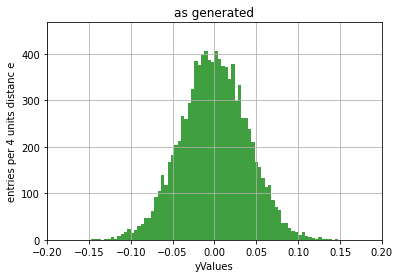

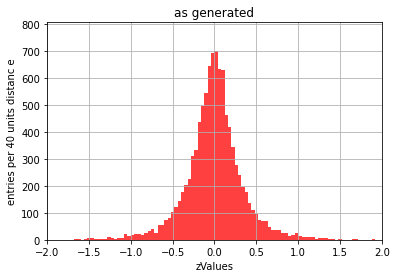

In [8]:
plt.figure()
nC, binsC, patches = plt.hist(xValues, bins=100, range=[-0.200,0.200], density=False, facecolor="b", alpha=0.75)

plt.xlabel('xValues')
plt.ylabel('entries per 4 units distanc e')
plt.title('as generated')
plt.axis([-0.200,0.200,0,1.15*max(nC)])
plt.grid(True)
plt.show()
plt.close()


##-------

plt.figure()
nC, binsC, patches = plt.hist(yValues, bins=100, range=[-0.200,0.200], density=False, facecolor="g", alpha=0.75)

plt.xlabel('yValues')
plt.ylabel('entries per 4 units distanc e')
plt.title('as generated')
plt.axis([-0.200,0.200,0,1.15*max(nC)])
plt.grid(True)
plt.show()
plt.close()


##-------

plt.figure()
nC, binsC, patches = plt.hist(zValues, bins=100, range=[-2.00,2.00], density=False, facecolor="r", alpha=0.75)

plt.xlabel('zValues')
plt.ylabel('entries per 40 units distanc e')
plt.title('as generated')
plt.axis([-2.0,2.0,0,1.15*max(nC)])
plt.grid(True)
plt.show()
plt.close()

In [9]:
def poca(p1,v1,p2,v2):
    v1sq = np.dot(v1,v1)
    v2sq = np.dot(v2,v2)
    v1_dot_v2 = np.dot(v1,v2)
    a = v1sq
    b = -v1_dot_v2
    c = v1_dot_v2
    d = -v2sq
    deltaP = p2 -p1
    dp_dot_v1 = np.dot(deltaP,v1)
    dp_dot_v2 = np.dot(deltaP,v2)
    det = a*d-b*c
    inverseMat = np.array([[d,-b],[-c,a]])/det
    vectA = np.array([dp_dot_v1,dp_dot_v2])
    points = np.matmul(inverseMat,vectA)

##    matA = np.array([[a,b],[c,d]])
##    sanity = np.matmul(matA,inverseMat)
##    print("sanity = ",sanity)

    r0 = points[0]
    s0 = points[1]

    L1_poca = p1 + r0*v1
    L2_poca = p2 + s0*v2
    v3 = L2_poca - L1_poca
    doca = np.sqrt(np.dot(v3,v3))
##    print("doca = ",doca)

## zhat is perpendicular to both the lines 1 and 2
    zhat = v3/doca
    v2_mag = np.sqrt(np.dot(v2,v2))
    xhat = v2/v2_mag
    yhat = np.cross(zhat,xhat)

    return r0, s0, doca, xhat, yhat, zhat


In [10]:
docaValues = []
for index in range(0,1000):
  p2, v2 = genLine()
  r0, s0, doca, xhat, yhat, zhat = poca(p1,v1,p2,v2)
  docaValues.append(doca)

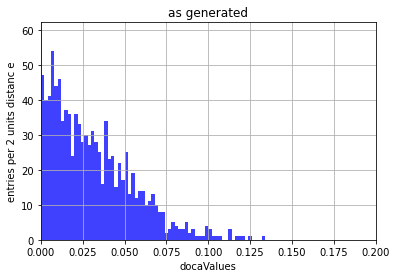

In [11]:
plt.figure()
nC, binsC, patches = plt.hist(docaValues, bins=100, range=[0,0.200], density=False, facecolor="b", alpha=0.75)

plt.xlabel('docaValues')
plt.ylabel('entries per 2 units distanc e')
plt.title('as generated')
plt.axis([0,0.200,0,1.15*max(nC)])
plt.grid(True)
plt.show()
plt.close()

In [12]:
roadError = 0.040
center = p2 + s0*v2
minorAxis_1 = roadError*zhat
minorAxis_2 = roadError*yhat

## by construction, xhat is parallel to line 2

cosTheta = np.dot(v1,v2)/np.sqrt(np.dot(v1,v1)*np.dot(v2,v2))
theta = math.acos(cosTheta)
tanTheta = math.tan(theta)
print('theta = ',theta)
print('tan(theta)  = ', tanTheta)
majorAxis = (roadError/tanTheta)*xhat
##print("center = ",center)
##print("minorAxis_1 = ",minorAxis_1)
##print("minorAxis_2 = ",minorAxis_2)
##print("majorAxis = ",majorAxis)

theta =  0.10267643020249263
tan(theta)  =  0.10303877864918522


In [13]:
def errorEllipse(p2, v2, s0, xhat, yhat, zhat, roadError=0.0566):
    center = p2 + s0*v2
    minorAxis_1 = roadError*zhat
    minorAxis_2 = roadError*yhat
    cosTheta = np.dot(v1,v2)/np.sqrt(np.dot(v1,v1)*np.dot(v2,v2))
    theta = math.acos(cosTheta)
    tanTheta = math.tan(theta)
    majorAxis = (roadError/tanTheta)*xhat
##    print("  ")
##    print("center = ",center)
##    print("minorAxis_1 = ",minorAxis_1)
##    print("minorAxis_2 = ",minorAxis_2)
##    print("majorAxis = ",majorAxis)
    return center, minorAxis_1, minorAxis_2, majorAxis

In [14]:
docaValues = []
for index in range(0,5):
  p2, v2 = genLine()
  r0, s0, doca, xhat, yhat, zhat = poca(p1,v1,p2,v2)
  center, minorAxis_1, minorAxis_2, majorAxis = errorEllipse(p2, v2, s0, xhat, yhat, zhat,roadError=0.0566)
  

In [15]:
center, minorAxis_1, minorAxis_2, majorAxis = errorEllipse(p2, v2, s0, xhat, yhat, zhat,roadError=0.0566)

from https://math.stackexchange.com/questions/1865188/how-to-prove-the-parallel-projection-of-an-ellipsoid-is-an-ellipse

Up to translation, a general ellipsoid can be written in the form

  𝐴$𝑥^2$ +𝐵$𝑦^2$+𝐶$𝑧^2$+2(𝐷𝑥𝑦+𝐸𝑥𝑧+𝐹𝑦𝑧)=1
  
for some positive-definite coefficient matrix 

$$
\left(\begin{array}{ccc}
A & D & E \\
D & B & F \\
E & F & C \\
\end{array}\right)
$$

1. For definiteness, project the ellipsoid to the (𝑥,𝑦)-plane along the 𝑧-axis, and call the image the shadow. A point 𝑝=(𝑥,𝑦,𝑧) on the ellipsoid projects to the boundary of the shadow if and only if the tangent plane to the ellipsoid at 𝑝 is parallel to the 𝑧-axis, if and only if 

$$ 
0 = \frac{\partial}{\partial z} \left ( A x^2 + B y^2 + C z^2 + s ( D x y + E x z + F y z ) \right ) \cdot ( p - p_0) \, ,
$$

Our ellipsoids have minor and major axes that (generally) are not parallel to the usual $ x $, $ y $, and $ z $ axes.  Let's label them as the $ u_1 $, $ u_2 $ and $ u_3 $ axes:

In [16]:
mag_1 = np.sqrt(np.dot(minorAxis_1,minorAxis_1))
u1_hat = minorAxis_1/mag_1
mag_2 = np.sqrt(np.dot(minorAxis_2,minorAxis_2))
u2_hat = minorAxis_2/mag_2
mag_3 = np.sqrt(np.dot(majorAxis,majorAxis))
u3_hat = majorAxis/mag_3

print("mag_1, u1_hat = ",mag_1, u1_hat)
print("mag_2, u2_hat = ",mag_2, u2_hat)
print("mag_3, u3_hat = ",mag_3, u3_hat)

dot12 = np.dot(u1_hat,u2_hat)
print("dot12 = ",dot12)
dot23 = np.dot(u2_hat,u3_hat)
print("dot23 = ",dot23)
dot31 = np.dot(u3_hat,u1_hat)
print("dot31 = ",dot31)

mag_1, u1_hat =  0.056600000000000004 [ 9.84748155e-01 -1.73985834e-01  2.99438217e-14]
mag_2, u2_hat =  0.0566 [-0.17078789 -0.96664801  0.19084841]
mag_3, u3_hat =  0.29111934627019026 [0.03320492 0.18793762 0.98161952]
dot12 =  -3.067333805101772e-17
dot23 =  0.0
dot31 =  2.975426239101794e-14


The surface of the ellipsoid is now defined by the equation
$$ \left ( \frac{\vec x \cdot \hat u_1}{a} \right )^2 +  
   \left ( \frac{\vec x \cdot \hat u_2}{b} \right )^2 +
   \left ( \frac{\vec x \cdot \hat u_3}{c} \right )^2  = 1
$$
where 
$$ a = | minorAxis_1 | $$
$$ b = | minorAxis_2 | $$
$$ c = | majorAxis | $$

This leads us to define
$$ \vec u_1 = \hat u1 / | minorAxis_1 | $$
$$ \vec u_2 = \hat u2 / | minorAxis_2 | $$
$$ \vec u_3 = \hat u_3 / | majorAxis | $$

In [17]:
u1 = u1_hat/mag_1
u2 = u2_hat/mag_2
u3 = u3_hat/mag_3

With this notation, the equation for the ellipse becomes

$$ (\vec x \cdot \vec u_1)^2 + ( \vec x \cdot u_2)^2 +
   (\vec x \cdot \vec u_3)^2 = 1
   $$
   
  and writing the corrdinates of a point as $ \vec x = (x, y, z) $ it becomes
  
  $$ (x \, u_{1x} + y \, u _{1y} + z \, u_{1z})^2 +
     (x \, u_{2x} + y \, u _{2y} + z \, u_{2z})^2 +
     (x \, u_{3x} + y \, u _{3y} + z \, u_{3z})^2  = 1
  $$
  
  or
  
  $$ \begin{array}{ccc}
    (u_{1x}^2 + u_{2x}^2 + u_{3x}^2) \, x^2 & + & \\
    (u_{1y}^2 + u_{2y}^2 + u_{3y}^2) \, y^2 & + & \\
    (u_{1z}^2 + u_{2z}^2 + u_{3z}^2) \, z^2 & + & \\
    2 \left ( u_{1x}u_{1y} + u_{2x}u_{2y} + u_{3x}u_{3y} \right ) xy & + & \\
    2 \left ( u_{1y}u_{1z} + u_{2y}u_{2z} + u_{3y}u_{3z} \right ) yz & + & \\
    2 \left ( u_{1z}u_{1x} + u_{2z}u_{2x} + u_{3z}u_{3x} \right ) zx & = & 1
     \end{array}
  $$
  
  from which we can extract the forms of $ A $, $ B $, etc.:
  
  $$ \begin{array}{ccc}
       A & = & u_{1x}^2 + u_{2x}^2 + u_{3x}^2 \\
       B & = & u_{1y}^2 + u_{2y}^2 + u_{3y}^2 \\
       C & = & u_{1z}^2 + u_{2z}^2 + u_{3z}^2  \\
       D & = & u_{1x}u_{1y} + u_{2x}u_{2y} + u_{3x}u_{3y} \\
       E & = & u_{1z}u_{1x} + u_{2z}u_{2x} + u_{3z}u_{3x} \\
       F & = & u_{1y}u_{1z} + u_{2y}u_{2z} + u_{3y}u_{3z} \\
     \end{array}
  $$

In [18]:
A = u1[0]*u1[0] + u2[0]*u2[0] + u3[0]*u3[0]
B = u1[1]*u1[1] + u2[1]*u2[1] + u3[1]*u3[1]
C = u1[2]*u1[2] + u2[2]*u2[2] + u3[2]*u3[2]
D = u1[0]*u1[1] + u2[0]*u2[1] + u3[0]*u3[1]
E = u1[2]*u1[0] + u2[2]*u2[0] + u3[2]*u3[0]
F = u1[1]*u1[2] + u2[1]*u2[2] + u3[1]*u3[2]
print("A, B, C, D, E, F = %5.1f %5.1f %5.1f %5.1f %5.1f %5.1f" %(A, B, C, D, E, F))


A, B, C, D, E, F = 311.8 301.5  22.7  -1.9  -9.8 -55.4


In [19]:
def six_ellipsoid_parameters(majorAxis,minorAxis_1,minorAxis_2):
    
## takes ellipsoid axes in Cartesian coordinates and returns'
## six coefficients that describe the surface of the ellipsoid
## as
## (see https://math.stackexchange.com/questions/1865188/how-to-prove-the-parallel-projection-of-an-ellipsoid-is-an-ellipse)
##
##   A x^2 + B y^2 + C z^2 + 2(Dxy + Exz +Fyz) = 1
##
## note that this notation is NOT universal; the wikipedia article at
## https://en.wikipedia.org/wiki/Ellipse usses a similar, but different 
## in detail, notation.

  mag_1 = np.sqrt(np.dot(minorAxis_1,minorAxis_1))
  u1_hat = minorAxis_1/mag_1
  mag_2 = np.sqrt(np.dot(minorAxis_2,minorAxis_2))
  u2_hat = minorAxis_2/mag_2
  mag_3 = np.sqrt(np.dot(majorAxis,majorAxis))
  u3_hat = majorAxis/mag_3

  u1 = u1_hat/mag_1
  u2 = u2_hat/mag_2
  u3 = u3_hat/mag_3

  A = u1[0]*u1[0] + u2[0]*u2[0] + u3[0]*u3[0]
  B = u1[1]*u1[1] + u2[1]*u2[1] + u3[1]*u3[1]
  C = u1[2]*u1[2] + u2[2]*u2[2] + u3[2]*u3[2]
  D = u1[0]*u1[1] + u2[0]*u2[1] + u3[0]*u3[1]
  E = u1[2]*u1[0] + u2[2]*u2[0] + u3[2]*u3[0]
  F = u1[1]*u1[2] + u2[1]*u2[2] + u3[1]*u3[2]
  
  return A, B, C, D, E ,F

The parallel projection of an eillipsoid described using the formalism with variables
$ A, B, C, D, E, F $ onto the (x,y) axis produces the equation of an ellipse

$$ \alpha \, x^2 + \beta \, y^2 + \gamma \, xy = \delta $$

with

$$ \begin{array}{ccl}
  \alpha & = &  C A -  E^2 \\
  \beta  & = &  C B - F^2 \\
  \gamma & = & 2\,( C D - EF) \\
  \delta & = & C \\
 \end{array}
$$


In [20]:
alpha_xy = C*A - E*E
beta_xy  = C*B - F*F
##gamma_xy = 4*C*C*D - 2*C*E*F ## original calculation
gamma_xy =  - 2*(C*D - E*F)  ## 200901 calculation
delta_xy = C
print("alpha_xy, beta_xy, gamma_xy, delta_xy = %5.3f %5.3f %5.3f %5.3f"%(alpha_xy, beta_xy, gamma_xy, delta_xy))

alpha_xy, beta_xy, gamma_xy, delta_xy = 6994.715 3786.570 1170.162 22.739


In [21]:
def xy_parallel_projection(A, B, C, D, E ,F):
    alpha_xy = C*A - E*E
    beta_xy  = C*B - F*F
    gamma_xy =  - 2*(C*D - E*F)  ## 200901 calculation
    delta_xy = C
    
    return alpha_xy, beta_xy, gamma_xy, delta_xy

In [22]:
## as a test of code below, set gamma to zero
##gamma_xy = 0

The Ellipse() method from matplotlib.patches takes the length of the major and minor axes plus the angle (in degrees) as arguments. If my algebra is correct, we can calculate the length of the axes as $ a $ and $ b $ and the angle $ \theta $ from $ \alpha, \, \beta, \, \gamma, $ and
$ \delta $ using

$$
\begin{array}{ccc}
  \theta      & = & \tan^{-1}\sqrt{\frac{\beta}{\alpha}} \\
    a^2, \, b^2 & = & \frac{\beta \pm \sqrt{ \beta^2 - \frac{4 \beta \delta}{(\alpha+\beta)}} }
    {2 \sqrt{ \frac{\beta}{\alpha+\beta}   }}  \\
  a      & = & \sqrt{a^2} \\
  b      & = & \sqrt{b^2} \\
\end{array}
$$


where $ a^2 $ is the larger of the two solutions to the quadratic equation and $ b^2 $ is the smaller.

In [23]:
## let's make up some values for well understood ellipses
alpha_xy = 1
beta_xy  = 4 
gamma_xy = 0
delta_xy = 1

In [24]:
## let's try the wikipedia formulas
sqrt_term = math.sqrt( (alpha_xy-beta_xy)**2 + gamma_xy**2)
numerator_A = 2*(4*alpha_xy*beta_xy-gamma_xy**2)*delta_xy
numerator_B_plus  = alpha_xy+beta_xy+sqrt_term
numerator_B_minus = alpha_xy+beta_xy-sqrt_term
denominator = (4*alpha_xy*beta_xy-gamma_xy**2)
print("sqrt_term  = %5.1f" %sqrt_term)
print("numerator_A  = %5.1f" %numerator_A)
print("numerator_B_plus  = %5.1f" %numerator_B_plus)
print("numerator_B_minus  = %5.1f" %numerator_B_minus)
print("denominator  = %5.1f" %denominator)

a = math.sqrt(numerator_A*numerator_B_plus)/denominator
print(" a = %5.1f " %a)
b = math.sqrt(numerator_A*numerator_B_minus)/denominator
print(" b = %5.1f " %b)

if (0 != gamma_xy):
    theta = math.atan( (beta_xy - alpha_xy - sqrt_term)/gamma_xy )
if (0 == gamma_xy):
    theta = 0
print("theta = %5.3f " %theta)
print("theta in degrees = %5.1f "%(180.*theta/math.pi))

sqrt_term  =   3.0
numerator_A  =  32.0
numerator_B_plus  =   8.0
numerator_B_minus  =   2.0
denominator  =  16.0
 a =   1.0 
 b =   0.5 
theta = 0.000 
theta in degrees =   0.0 


In [25]:
## let's try the wikipedia formulas, taken from
## https://en.wikipedia.org/wiki/Ellipse
## and accounting for the different meaning of the
## parameters (A, B, C, D, E, F) used here and there
def ellipse_parameters_for_plotting(alpha_xy,beta_xy,gamma_xy,delta_xy):

  sqrt_term = math.sqrt( (alpha_xy-beta_xy)**2 + gamma_xy**2)
  numerator_A = 2*(4*alpha_xy*beta_xy-gamma_xy**2)*delta_xy
  numerator_B_plus  = alpha_xy+beta_xy+sqrt_term
  numerator_B_minus = alpha_xy+beta_xy-sqrt_term
  denominator = (4*alpha_xy*beta_xy-gamma_xy**2)
  a = math.sqrt(numerator_A*numerator_B_plus)/denominator
  b = math.sqrt(numerator_A*numerator_B_minus)/denominator
  if (0 != gamma_xy):
    theta = math.atan( (beta_xy - alpha_xy - sqrt_term)/gamma_xy )
  if (0 == gamma_xy) & (A<C):
    theta = 0
  if (0 == gamma_xy) & (A>C):
    theta = 0.5*math.pi

## the Ellipse() method in matplotlib.patches wants andgles in degrees
  return a, b, 180.*theta/math.pi  

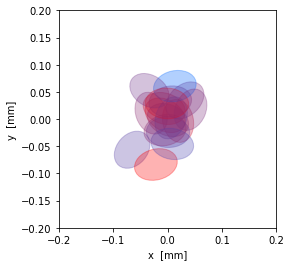

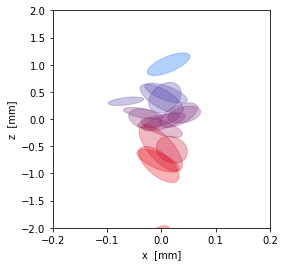

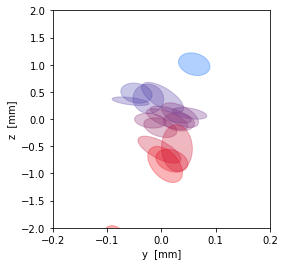

In [26]:
ells = []
ells_xz = []
ells_yz = []
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
red_0 = 25/256
green_0 = 82/256
blue_0 = 100/256
myColorRed = []
myColorRed   = np.array([0xff, 0xf2, 0xe6, 0xd9, 0xcc, 0xbf, 0xb2, 0xa6, 0x99, 0x8c, 0x80,
                0x73, 0x66, 0x59, 0x4d, 0x40, 0x33, 0x26, 0x19, 0x0d, 0x00])
myColorGreen = np.array([0x00, 0x05, 0x0a, 0x0f, 0x14, 0x1a, 0x1f, 0x24, 0x29, 0x2e, 0x33,
                0x38, 0x3d, 0x42, 0x47, 0x4c, 0x52, 0x57, 0x5c, 0x61, 0x66])
myColorBlue  = np.array([0x00, 0x0d, 0x1a, 0x26, 0x33, 0x40, 0x4c, 0x59, 0x66, 0x73, 0x80,
                0x8c, 0x99, 0xa6, 0xb2, 0xbf, 0xcc, 0xd9, 0xe6, 0xf2, 0xff])
myColorRed = myColorRed/256
myColorBlue = myColorBlue/256
myColorGreen = myColorGreen/256

for index in range(0,17):
  p1 = np.array([0,0,0])
  v1 = np.array([0,0,1])
  p2, v2 = genLine()
  r0, s0, doca, xhat, yhat, zhat = poca(p1,v1,p2,v2)
  center, minorAxis_1, minorAxis_2, majorAxis = errorEllipse(p2, v2, s0, xhat, yhat, zhat, roadError=0.0566)
    
  A, B, C, D, E ,F = six_ellipsoid_parameters(majorAxis,minorAxis_1,minorAxis_2)

## the next two lines produce the parameters used to draw the ellipse of the
## parallel projection of the ellipsoid onto the (x,y) plane
  alpha_xy, beta_xy, gamma_xy, delta_xy = xy_parallel_projection(A, B, C, D, E ,F)
  a, b, theta = ellipse_parameters_for_plotting(alpha_xy,beta_xy,gamma_xy,delta_xy)

## the next two lines produce the parameters used to draw the ellipse of the
## parallel projection of the ellipsoid onto the (x,z) plane
  alpha_xz, beta_xz, gamma_xz, delta_xz = xy_parallel_projection(A, C, B, E, D, F)
  a_xz, b_xz, theta_xz = ellipse_parameters_for_plotting(alpha_xz,beta_xz,gamma_xz,delta_xz)


## the next two lines produce the parameters used to draw the ellipse of the
## parallel projection of the ellipsoid onto the (y,z) plane
  alpha_yz, beta_yz, gamma_yz, delta_yz = xy_parallel_projection(B, C, A, F, D, E)
  a_yz, b_yz, theta_yz = ellipse_parameters_for_plotting(alpha_yz,beta_yz,gamma_yz,delta_yz)


  L2 = p2 + s0*v2
  delta_z = L2[2] - p1[2]
  colorIndex = 10 + math.floor(10 * (delta_z) )
  colorIndex = max(0,colorIndex)
  colorIndex = min(20,colorIndex)
##  print("colorIndex = ", colorIndex)

  thisEllipse = Ellipse(center, a, b, theta,color=(myColorRed[colorIndex], 
                        myColorGreen[colorIndex],myColorBlue[colorIndex]))
  ells.append(thisEllipse)

##
  center_xz = [center[0], center[2]]
  xzEllipse = Ellipse(center_xz, a_xz, b_xz, theta_xz,color=(myColorRed[colorIndex], 
                        myColorGreen[colorIndex],myColorBlue[colorIndex]))
  ells_xz.append(xzEllipse)
##
  center_yz = [center[1], center[2]]
  yzEllipse = Ellipse(center_yz, a_yz, b_yz, theta_yz,color=(myColorRed[colorIndex], 
                        myColorGreen[colorIndex],myColorBlue[colorIndex]))
  ells_yz.append(yzEllipse)
    
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(0.3)
##    e.set_facecolor(.18, .31, .31)

ax.set_xlim(-0.2,0.2)
ax.set_ylim(-0.2,0.2)
ax.set_xlabel('x  [mm]')
ax.set_ylabel('y  [mm]')

plt.show()

fig, ax = plt.subplots(subplot_kw={'aspect': 0.10})
for e in ells_xz:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(0.3)

ax.set_xlim(-0.2,0.2)
ax.set_ylim(-2.0,2.0)
ax.set_xlabel('x  [mm]')
ax.set_ylabel('z  [mm]')

plt.show()

fig, ax = plt.subplots(subplot_kw={'aspect': 0.10})
for e in ells_yz:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(0.3)

ax.set_xlim(-0.2,0.2)
ax.set_ylim(-2.0,2.0)
ax.set_xlabel('y  [mm]')
ax.set_ylabel('z  [mm]')

plt.show()

  